# MATRIX EIGENVALUE PROBLEM : Write in your own words how does the EIG command work on pseudocode level (enough to explain the mathematics behind it). Also write out the main formulae in Jupyter Notebook.

Take a n * n matrix A where the eign vectors are denoted by $\bar{x_i}$ and the corresponding eigen values denoted by $\lambda_i$. To find the eigen value do the following steps:-

1. Multiply a n * n scaler matrix by the scaler.
2. Substract the identity matrix (I) multiple from the matrix A.
3. Find the determinent of the matrix and difference.
4. Solve the values of $\lambda$ that satisfy the equation det(A -$\lambda$I) = 0
5. Solve for the corresponding vector to each $\lambda$.

$$A ={\begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}}$$

$$\lambda I = \lambda\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}= \begin{bmatrix}\lambda & 0 \\ 0 & \lambda \end{bmatrix}$$

$$A - \lambda I ={\begin{bmatrix} 0 & 1 \\ -2 & -3 \end{bmatrix}} - {\begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix}} $$

$$ ={\begin{bmatrix} 0 - \lambda & 1 \\ -2 & -3 -\lambda \end{bmatrix}} $$

$$det {\begin{bmatrix} 0 - \lambda & 1 \\ -2 & -3 -\lambda \end{bmatrix}} = (0 - \lambda)(-3 -\lambda) - (-2)(1) $$

$$ = 0 - 0 + 3\lambda + \lambda ^ 2 + 2 $$

$$ = \lambda ^ 2 + 3\lambda + 2 $$

Let $$\lambda ^ 2 + 3\lambda + 2 = 0$$

$$(\lambda - 1)(\lambda - 2) = 0 $$

$$\lambda = 1, 2$$

The eign value as calculated from the above examples are 1 and 2

# Replicate all the steps of https://sebastianraschka.com/Articles/2014_pca_step_by_step.html up to the end of point 5. 

In [1]:
import numpy as np

#np.random.seed(234234782384239784) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [2]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [3]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.66151097]
 [0.76910841]
 [0.44862261]]


In [4]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[56.26679562 10.86536876 16.11178042]
 [10.86536876 40.17201471 18.94427015]
 [16.11178042 18.94427015 40.45856349]]


In [5]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.44273835 0.2785992  0.41312257]
 [0.2785992  1.03005166 0.48575052]
 [0.41312257 0.48575052 1.03739906]]


In [6]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[0.68050624]
 [0.48364062]
 [0.55045709]]
Eigenvalue 1 from scatter matrix: 77.02160542068137
Eigenvalue 1 from covariance matrix: 1.9749129595046506
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.71950243]
 [-0.58320842]
 [-0.37707318]]
Eigenvalue 2 from scatter matrix: 39.01585339513366
Eigenvalue 2 from covariance matrix: 1.0004064973111197
Scaling factor:  38.99999999999999
----------------------------------------
Eigenvector 3: 
[[-0.1386633 ]
 [-0.65265587]
 [ 0.74485757]]
Eigenvalue 3 from scatter matrix: 20.859915015491296
Eigenvalue 3 from covariance matrix: 0.5348696157818278
Scaling factor:  39.00000000000002
----------------------------------------


In [14]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


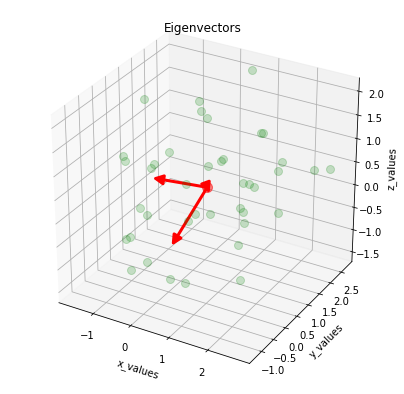

In [15]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [16]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [17]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

61.55908168251448
37.42310220227206
35.37337066367772


In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.78863822  0.58890399]
 [ 0.49474883 -0.77847972]
 [ 0.36506624 -0.21716678]]
